# Name: Carlos Gross-Martinez
# Z Number: 23226341
# https://colab.research.google.com/drive/1HMq_2VvZedHHFwLn1N6fyNKmDhxLp1qj?usp=sharing
Problem 1

11493376/11490434 [==============================] - 0s 0us/step
The Training set accuracy is: 0.95


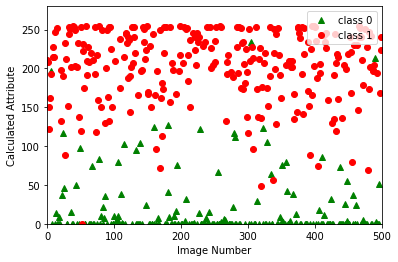

The Validation set accuracy is: 0.95


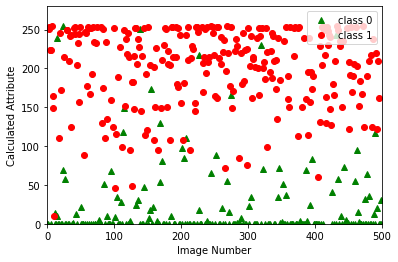

The Testing set accuracy is: 0.97


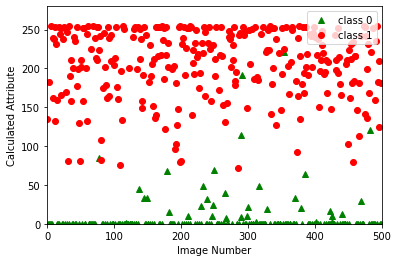

In [ ]:
#function import from libraries
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

#dataset_filter function
#input: dataset images and dimensions with the corresponding labels
#output: dataset with images only containing digits '1' and '0'
def dataset_filter(x, y):
  filter_values = (y == 0) | (y == 1)
  x = x[filter_values]
  y = y[filter_values]
  y = y == 0     #0 is being set as true label
  return x, y

#plot_model function
#input: dataset images and dimensions with the corresponding labels
#output: displays sample images calculated attibutes per sample plotted
def plot_model(c_x, c_y):
  index = 0
  colors = ['g^', 'ro']

  for x, y in zip(c_x, c_y):
    plt.plot(x, y, colors[index], label = 'class {}'.format(index))
    index += 1

  plt.xlabel('Image Number')
  plt.ylabel('Calculated Attribute')
  plt.legend(loc = 'upper right')

  plt.axis([0, 500, 0, 280])
  plt.show(c_x, c_y)

#calculate_average function
#input: images and dimensions
#output: average in pixels of attibutes in image
def calculate_average(rows, columns, training_img):
  pixel_sum = pixel_counted = 0
  half = (rows / 2) - 1

  for i in range(rows):
    if i >= half - 1 and i <= half + 1:
      for j in range(columns):
        if j >= half and j <= half + 1:
          pixel_counted = pixel_counted + 1
          pixel_sum = pixel_sum + training_img[i, j]

  return pixel_sum / pixel_counted

#accuracy_calc function
#input: dataset images and dimensions, name of dataset,
#       the total number of samples to plot, and the threshold
#output: prints the calculated accuracy
def accuracy_calc(x, y, dataset, max_samples, threshold):
  sample = 0
  correct_classify = 0

  c1_x = []
  c1_y = []
  c0_x = []
  c0_y = []

  c_x = [c0_x, c1_x]
  c_y = [c0_y, c1_y]

  while sample < max_samples:

    average = calculate_average(28, 28, x[sample,:,:])

    if (not y[sample]):
      c1_x.append(sample)
      c1_y.append(average)
    else:
      c0_x.append(sample)
      c0_y.append(average)

    if ((average > threshold) and not y[sample]):
      correct_classify += 1
    elif (not (average > threshold) and y[sample]):
      correct_classify += 1
    sample = sample + 1

  print('The {} set accuracy is: {:.2f}'.format(dataset, correct_classify/max_samples))
  plot_model(c_x, c_y)


#########################################################################################
#                                    Start of Program                                   #
#########################################################################################

#spliting MNIST dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Rectification of tranining and testing datasets to only contain "0" and "1" images
x_train, y_train = dataset_filter(x_train, y_train)
x_test, y_test = dataset_filter(x_test, y_test)

#shuffling the training set
num_train_img = x_train.shape[0]
train_ind = np.arange(0, num_train_img)
train_ind_s = np.random.permutation(train_ind)

#readjusting training set with new shuffle parameters
x_train = x_train[train_ind_s,:,:]
y_train = y_train[train_ind_s]

#select 20% of the trainig set for validation
x_valid = x_train[0 : int(0.2 * num_train_img),:,:]
y_valid = y_train[0 : int(0.2 * num_train_img)]

#select 80% of the trainig set for training
x_train = x_train[int(0.8 * num_train_img):,:,:]
y_train = y_train[int(0.8 * num_train_img):]

#Calculating and plotting accuracy set samples
accuracy_calc(x_train, y_train, 'Training', 500, 100)
accuracy_calc(x_valid, y_valid, 'Validation', 500, 100)
accuracy_calc(x_test, y_test, 'Testing', 500, 100)